# Imports and constants

In [1]:
import cv2
import time
import os
from ultralytics import YOLO, solutions

In [2]:
EPOCHS = 50
IMG_SIZE = 640
SLEEP = 0.1
TRAIN_MODEL = True
SEED = 0

# Train model

We use `yolov8n.pt` as the starting pretrained model, and train it for `EPOCHS` epochs.

In [3]:
def train_model(pretrained_model: str, name: str):
    """
    Procedure to train a model and persist in the `name` subdirectory.
    `pretrained_model` indicates which version of the Yolo should be used.
    """
    if TRAIN_MODEL:
        model = YOLO(pretrained_model)
        results = model.train(
            data="data.yaml",
            epochs=EPOCHS,
            imgsz=IMG_SIZE,
            name=name,
            exist_ok=True,
            seed=SEED
        )
        # print("Metric:", model.val(data='data.yaml'))

## Original dataset

In [4]:
!mv datasets/images/train_original datasets/images/train

In [5]:
%%time
train_model(pretrained_model="yolov8n.pt", name="original")

New https://pypi.org/project/ultralytics/8.3.13 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=original, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

train: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/train... 4568 images, 1391 backgrounds, 0 corrup

train: New cache created: /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/train.cache



val: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/val.cache... 1304 images, 402 backgrounds, 0 corru

val: WARNING ⚠️ /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/images/val/9894_gerres_f000034_jpg.rf.077f365f7e09097b1627e75c4d237a57.jpg: 1 duplicate labels removed


Plotting labels to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/original/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/original
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.19G      1.932      2.417      1.325         31        640: 100%|██████████| 286/286 [00:38<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.74it/s]


                   all       1304       3033      0.554       0.38      0.371      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.19G        1.9       1.59      1.314         30        640: 100%|██████████| 286/286 [00:37<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.50it/s]


                   all       1304       3033      0.726        0.6      0.643      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.24G      1.884      1.459       1.31         24        640: 100%|██████████| 286/286 [00:38<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00,  8.27it/s]

                   all       1304       3033      0.779       0.61      0.691      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.24G      1.875      1.377      1.303         12        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.745      0.558      0.617      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.23G      1.808      1.294      1.272         14        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.769      0.622      0.689      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.23G      1.779      1.208      1.253         52        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.833      0.679       0.77      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.21G      1.757      1.168      1.234         26        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.813      0.647      0.751      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.2G      1.722      1.114      1.213         43        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.818      0.698      0.775      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G      1.694      1.069      1.196         28        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.847      0.709      0.793      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.18G      1.668      1.032      1.181         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033       0.86      0.729      0.819      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.21G       1.66      1.007      1.184         23        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.871      0.719      0.816       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.2G      1.638     0.9974      1.163         14        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.842      0.735      0.822      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.23G       1.62     0.9632      1.153         56        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.842      0.758      0.834       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.18G       1.61     0.9566       1.16          9        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.867      0.741      0.828      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.18G      1.581     0.9209      1.139         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033       0.88      0.781      0.852      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.18G      1.557     0.9072      1.136         10        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.878      0.783      0.865      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.2G      1.575     0.8974      1.129         44        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.863      0.738      0.828      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.21G      1.562     0.8938      1.127         27        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033       0.87      0.763      0.844      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.2G      1.542     0.8849      1.119         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.878      0.792      0.858      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.2G      1.538     0.8666      1.116         11        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.878      0.792      0.864      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.23G      1.515     0.8493      1.105         34        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.888      0.783       0.87      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.29G       1.52     0.8391      1.109         45        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.878      0.795      0.871      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.18G        1.5     0.8291      1.094         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.881      0.816      0.882       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.2G      1.501     0.8263      1.101         13        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.891      0.816      0.884      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.16G      1.486     0.8011      1.091         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.898      0.802      0.889      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.19G      1.456     0.7861      1.085         12        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033        0.9      0.803      0.888      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.18G      1.462     0.7819      1.083         39        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.906      0.824      0.897      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.21G      1.466     0.7878      1.086         12        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.901      0.813      0.894      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.21G      1.444     0.7673      1.074         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.914      0.817      0.896      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.2G      1.434     0.7516      1.061         25        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.908      0.834      0.906      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.18G      1.424     0.7509      1.064         33        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.902      0.842      0.903      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.18G      1.414       0.74      1.062         29        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.901      0.845       0.91      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.21G      1.404     0.7369      1.058          8        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.915      0.841      0.909       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.18G      1.403     0.7323      1.055         16        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033        0.9      0.838      0.907      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.23G      1.407     0.7313      1.055         29        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.919      0.842      0.915      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.18G      1.371     0.7136      1.048         20        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.915      0.848      0.914      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.18G      1.378      0.707      1.049         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.917      0.844      0.916      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.18G      1.375     0.7059      1.041         44        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.908      0.852      0.918      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.16G      1.358     0.6872      1.038         25        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.918      0.844      0.917      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.23G      1.344     0.6848      1.037          4        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.925      0.859      0.923      0.541


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.18G      1.366     0.6693      1.052         23        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.919       0.85      0.923      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.18G      1.347     0.6509      1.047         38        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.924      0.853      0.924      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.18G      1.329      0.639      1.038         21        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.929      0.846      0.924      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.2G      1.318     0.6281      1.033         10        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.923       0.86      0.928       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.18G        1.3     0.6175      1.027         21        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.929      0.854      0.926      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.18G      1.293     0.6155      1.027         15        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.933      0.859       0.93      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.18G      1.288     0.6073      1.018         20        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.939      0.862      0.934      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.17G      1.282     0.6054       1.02         22        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.927      0.871      0.934      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.18G      1.273     0.5966      1.016         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.927      0.868      0.935      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.16G      1.268     0.5922      1.012         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033       0.93      0.869      0.935      0.564



50 epochs completed in 0.588 hours.
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/original/weights/last.pt, 6.2MB
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/original/weights/best.pt, 6.2MB

Validating /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/original/weights/best.pt...
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████


                   all       1304       3033       0.93      0.869      0.935      0.564
Speed: 0.3ms preprocess, 2.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/original
CPU times: user 35min 54s, sys: 1min 16s, total: 37min 10s
Wall time: 35min 32s


In [6]:
!mv datasets/images/train datasets/images/train_original

## Contrast dataset

In [7]:
!mv datasets/images_preprocessed/contrast datasets/images/train

In [8]:
%%time
train_model(pretrained_model="yolov8n.pt", name="contrast")

New https://pypi.org/project/ultralytics/8.3.13 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=contrast, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

train: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/train... 456


train: New cache created: /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/train.cache


val: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/val.cache... 1

val: WARNING ⚠️ /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/images/val/9894_gerres_f000034_jpg.rf.077f365f7e09097b1627e75c4d237a57.jpg: 1 duplicate labels removed


Plotting labels to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/contrast/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/contrast
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.16G      2.014      2.559      1.369         31        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████


                   all       1304       3033      0.677      0.519      0.566      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.15G      1.998       1.74      1.345         30        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.576      0.484      0.498      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.19G      1.989        1.6      1.358         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████


                   all       1304       3033      0.682      0.453      0.512      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.24G      1.974      1.506      1.353         12        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.764      0.589      0.658      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.23G      1.891      1.388      1.307         14        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████


                   all       1304       3033      0.786      0.636      0.715      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.23G      1.869      1.331      1.296         52        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.753      0.602      0.669      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.22G      1.853      1.284      1.278         26        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.816      0.682      0.759      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.21G      1.817      1.211      1.259         43        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.845      0.661      0.768      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G      1.785      1.181      1.242         28        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.797      0.621      0.704      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.18G      1.748      1.128      1.219         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.809      0.653      0.734      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.21G      1.724      1.092      1.214         23        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.835      0.701      0.797       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.2G      1.717      1.086      1.199         14        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033       0.85      0.715      0.805      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.23G      1.706      1.065       1.19         56        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.873      0.726      0.821      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.18G      1.686      1.052      1.196          9        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.843      0.719      0.798      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.18G      1.651      0.996      1.168         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.856      0.742      0.822      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.19G      1.632          1      1.169         10        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.845      0.739       0.82      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.21G      1.647      0.992      1.164         44        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.856       0.76      0.838       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.21G      1.644     0.9728      1.162         27        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.882      0.755      0.841      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.2G      1.624     0.9701       1.16         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.865      0.766      0.844      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.2G      1.617     0.9396      1.148         11        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.873      0.763      0.836      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.23G      1.591     0.9309      1.139         34        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.875      0.772      0.851      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.29G      1.602     0.9232      1.144         45        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.894      0.773      0.857      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.18G      1.563     0.9006      1.122         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.886      0.784      0.861      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.2G      1.567     0.8905      1.132         13        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.888      0.783      0.866      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.16G      1.566      0.883      1.128         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.877      0.788      0.861       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.19G      1.532     0.8629      1.116         12        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.877      0.797      0.871      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.18G      1.532     0.8555      1.113         39        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.878      0.794       0.86      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.21G      1.541     0.8653      1.116         12        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.894      0.795      0.877      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.21G      1.515     0.8451      1.106         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.902        0.8      0.878      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.2G      1.501     0.8207      1.092         25        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.898      0.806      0.878      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.18G      1.506     0.8217        1.1         33        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033        0.9      0.805      0.876      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.18G      1.489     0.8151      1.092         29        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.907      0.805      0.881      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.21G      1.477     0.8122      1.087          8        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.904      0.809      0.882      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.18G      1.474     0.8006      1.084         16        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.908      0.825      0.893      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.23G      1.471     0.7941      1.084         29        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.908      0.817      0.891      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.18G      1.453     0.7831       1.08         20        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033       0.91      0.806      0.884      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.18G      1.444     0.7682      1.074         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.909      0.822      0.894      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.18G      1.443     0.7708      1.069         44        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.915      0.814      0.893      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.16G      1.428      0.752      1.065         25        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.911      0.828      0.893      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.23G      1.408     0.7525       1.06          4        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.918      0.823      0.899      0.512


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.18G      1.436     0.7367      1.083         23        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.923      0.823      0.902      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.18G      1.407     0.7112      1.072         38        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.919      0.832      0.904      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.18G      1.397     0.7009      1.071         21        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.922      0.827      0.903      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.2G      1.388     0.6888      1.065         10        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.918      0.825      0.899      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.18G      1.372     0.6789      1.059         21        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.925      0.832      0.907      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.18G      1.364     0.6777      1.056         15        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.925      0.831      0.901      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.18G      1.348     0.6658      1.048         20        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.928      0.833      0.906      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.18G       1.35      0.658      1.048         22        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.926      0.835      0.907      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.18G      1.335     0.6509      1.041         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████


                   all       1304       3033      0.923      0.834      0.907      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.16G      1.329     0.6482      1.036         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.927      0.838      0.908      0.532



50 epochs completed in 0.587 hours.
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/contrast/weights/last.pt, 6.2MB
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/contrast/weights/best.pt, 6.2MB

Validating /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/contrast/weights/best.pt...
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████


                   all       1304       3033      0.927      0.838      0.908      0.533
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/contrast
CPU times: user 35min 51s, sys: 1min 16s, total: 37min 8s
Wall time: 37min 25s


In [9]:
!mv datasets/images/train datasets/images_preprocessed/contrast

## Histogram dataset

In [10]:
!mv datasets/images_preprocessed/histogram datasets/images/train

In [11]:
%%time
train_model(pretrained_model="yolov8n.pt", name="histogram")

New https://pypi.org/project/ultralytics/8.3.13 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=histogram, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/train... 456


train: New cache created: /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/train.cache


val: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/val.cache... 1

val: WARNING ⚠️ /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/images/val/9894_gerres_f000034_jpg.rf.077f365f7e09097b1627e75c4d237a57.jpg: 1 duplicate labels removed


Plotting labels to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/histogram/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/histogram
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.18G      2.071      2.637      1.398         31        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████


                   all       1304       3033       0.48      0.309      0.318      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.15G       2.03      1.773      1.381         30        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033       0.58      0.323      0.362       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.19G       2.01      1.635       1.37         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.635      0.404      0.454      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.2G      2.002      1.541      1.365         12        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████


                   all       1304       3033      0.636      0.394      0.446       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.21G      1.933      1.456      1.329         14        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.511      0.366      0.406      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.13G      1.896       1.39      1.318         52        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.684      0.318      0.385      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.19G      1.883      1.305      1.293         26        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.664      0.365      0.439      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.17G      1.834      1.264      1.274         43        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.598       0.35      0.391      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.14G      1.799      1.195      1.246         28        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████


                   all       1304       3033       0.55      0.349      0.368      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.19G       1.78      1.172      1.239         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.541      0.355      0.388      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.18G      1.765      1.151      1.237         23        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033       0.63      0.472      0.523      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.11G      1.732      1.113      1.209         14        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.614       0.39      0.452      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.18G      1.728      1.109      1.205         56        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.675      0.326      0.397      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.24G      1.707      1.069      1.206          9        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.601      0.336       0.39      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.11G      1.693      1.048      1.188         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.562      0.332      0.365      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.17G      1.662      1.023      1.183         10        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.585      0.377      0.438      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.17G      1.664     0.9978      1.171         44        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.703      0.399      0.482      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.17G      1.661     0.9979      1.167         27        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.517      0.423      0.433      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.23G      1.638     0.9958      1.165         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.573      0.349      0.371      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.17G      1.644     0.9814      1.163         11        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.736      0.409        0.5      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.14G      1.628     0.9655      1.155         34        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.677      0.415      0.494      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.25G      1.607     0.9386      1.148         45        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.622       0.33       0.38      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.17G       1.59     0.9259      1.131         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033        0.7      0.372      0.453      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.17G      1.586     0.9164       1.14         13        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033       0.74      0.435      0.534      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.17G      1.585     0.8999      1.132         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.699      0.453      0.535      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.17G      1.556      0.886      1.128         12        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.645      0.379      0.425      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.17G      1.554     0.8792      1.124         39        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.679      0.465      0.529      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.18G      1.552     0.8723      1.124         12        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.698      0.438      0.501      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.18G      1.528     0.8559      1.113         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.679      0.388       0.45       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.16G      1.527      0.842      1.099         25        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.697      0.393      0.489      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.19G      1.524     0.8424      1.105         33        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.718      0.449      0.533      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.17G      1.503     0.8218      1.098         29        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.639      0.432      0.479      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.25G      1.489     0.8179      1.093          8        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.679      0.428      0.488      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.25G      1.503     0.8202      1.094         16        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.683      0.431      0.502      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.2G      1.491     0.8161      1.091         29        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.718      0.421      0.512      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.17G      1.458     0.7943      1.083         20        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.734      0.441      0.524      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.17G      1.463     0.7873      1.081         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.727       0.45       0.54      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.19G      1.455     0.7817       1.07         44        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033       0.63      0.382      0.438      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.13G      1.442     0.7613      1.069         25        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.675       0.45       0.52      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.17G      1.427     0.7576       1.07          4        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.675      0.442      0.511      0.265


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.2G      1.443     0.7386      1.087         23        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.773      0.469       0.57      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       2.1G      1.426      0.719      1.079         38        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.771      0.431      0.541      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.09G      1.404     0.7062       1.07         21        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.758      0.387      0.505      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.11G      1.405     0.7005       1.07         10        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.746      0.386      0.494      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.11G      1.381     0.6863      1.063         21        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.764      0.399      0.515      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.1G      1.372     0.6789      1.058         15        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.793      0.394      0.515      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.11G      1.364     0.6705      1.052         20        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.778      0.378        0.5       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.08G      1.358     0.6682      1.051         22        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.775      0.392      0.514      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.09G      1.348     0.6566      1.044         24        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████


                   all       1304       3033      0.796      0.399      0.528      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.07G      1.333     0.6515      1.038         19        640: 100%|██████████| 286/286 [
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all       1304       3033      0.787      0.399      0.526      0.294



50 epochs completed in 0.586 hours.
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/histogram/weights/last.pt, 6.2MB
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/histogram/weights/best.pt, 6.2MB

Validating /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/histogram/weights/best.pt...
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████


                   all       1304       3033      0.772      0.469       0.57      0.299
Speed: 0.3ms preprocess, 2.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/histogram
CPU times: user 35min 50s, sys: 1min 14s, total: 37min 5s
Wall time: 37min 23s


In [12]:
!mv datasets/images/train datasets/images_preprocessed/histogram

## Adaptive dataset

In [4]:
!mv datasets/images_preprocessed/adaptive datasets/images/train

In [5]:
%%time
train_model(pretrained_model="yolov8n.pt", name="adaptive")

New https://pypi.org/project/ultralytics/8.3.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=adaptive, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

train: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/dat

train: New cache created: /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/train.cache



val: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datas

val: WARNING ⚠️ /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/images/val/9894_gerres_f000034_jpg.rf.077f365f7e09097b1627e75c4d237a57.jpg: 1 duplicate labels removed


Plotting labels to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/adaptive/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/adaptive
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.19G      1.929      2.389      1.317         31        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1304       3033       0.61      0.446      0.485       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.19G        1.9      1.579      1.305         30        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.661      0.493      0.543      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.24G      1.896       1.44       1.31         24        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.673      0.509      0.557      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.24G      1.861      1.343        1.3         12        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.744      0.537      0.603       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.23G      1.798      1.246      1.259         14        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.821      0.613      0.703      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.22G      1.764      1.201      1.244         52        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.807      0.615      0.705      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.21G      1.733       1.13       1.22         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.786      0.603      0.695      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.2G      1.707      1.093       1.21         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.831      0.637      0.732      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G      1.681      1.061      1.191         28        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.748      0.617      0.698      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.18G       1.66      1.027      1.178         19        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.805      0.665       0.76      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.21G      1.644      1.001      1.181         23        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.863      0.681      0.798      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.2G      1.616     0.9754      1.155         14        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.839      0.669      0.777        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.22G      1.603      0.947      1.144         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033       0.83       0.71      0.793      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.18G      1.589     0.9445      1.151          9        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033       0.85       0.69      0.793      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.18G      1.574     0.9187      1.135         19        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.818      0.693      0.781      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.18G      1.548     0.8939      1.131         10        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.836       0.71      0.801      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.2G      1.558     0.8891      1.125         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.855      0.731      0.813      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.21G      1.554     0.8781      1.123         27        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.856      0.716       0.81      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.2G      1.538     0.8811      1.119         24        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.811      0.707      0.784      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.2G      1.533     0.8549      1.114         11        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.833      0.634      0.734      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.23G      1.509     0.8371      1.103         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.881      0.702      0.812      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.29G      1.513      0.833      1.106         45        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.865      0.728      0.826      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.18G      1.491     0.8131       1.09         24        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.883      0.738      0.838      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.2G      1.477      0.806      1.093         13        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.869      0.749      0.838      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.16G      1.478     0.7936      1.088         19        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033       0.89      0.744      0.843      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.19G      1.453     0.7845      1.084         12        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.856      0.703      0.798      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.18G      1.456     0.7742      1.082         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.865      0.731      0.829      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.2G      1.449      0.775      1.079         12        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.858      0.761      0.839      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.21G      1.426      0.754      1.069         19        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.865      0.728      0.833      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.2G      1.419      0.742      1.057         25        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.886      0.734       0.84      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.18G      1.418     0.7508      1.063         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.859      0.745      0.835      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.18G      1.399     0.7311      1.052         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.904      0.763      0.865      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.2G      1.399     0.7319      1.056          8        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.886      0.771       0.86      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.18G      1.391     0.7243       1.05         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.881      0.742      0.849      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.23G        1.4     0.7181      1.053         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.889      0.775      0.864      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.18G      1.372     0.7088      1.047         20        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.897      0.789      0.879      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.18G      1.365     0.6991      1.042         24        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033       0.89      0.765      0.863      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.18G      1.372     0.6977      1.039         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.905      0.778      0.876      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.16G      1.342     0.6789      1.032         25        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.893      0.793      0.878        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.23G      1.332     0.6774      1.032          4        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.902      0.778      0.875      0.501


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.18G       1.35     0.6554      1.046         23        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.884      0.792      0.878      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.18G      1.336     0.6451      1.042         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.902      0.801      0.892      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.18G      1.316     0.6291      1.036         21        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.902      0.789      0.883      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.2G      1.316     0.6207      1.032         10        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.888      0.806      0.889      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.18G      1.299     0.6126      1.026         21        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.893      0.795      0.885      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.18G      1.283     0.6039      1.024         15        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033        0.9      0.796      0.888      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.18G      1.277     0.5995      1.017         20        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.897      0.791      0.883      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.17G      1.273     0.5964      1.018         22        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.897      0.794      0.887      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.18G      1.268     0.5862      1.014         24        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.892      0.799      0.888      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.16G      1.253      0.582      1.005         19        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.907      0.791      0.888      0.524



50 epochs completed in 0.591 hours.
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/adaptive/weights/last.pt, 6.2MB
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/adaptive/weights/best.pt, 6.2MB

Validating /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/adaptive/weights/best.pt...
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1304       3033      0.909      0.792      0.888      0.524
Speed: 0.3ms preprocess, 2.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/adaptive
CPU times: user 36min 6s, sys: 1min 17s, total: 37min 23s
Wall time: 35min 44s


In [6]:
!mv datasets/images/train datasets/images_preprocessed/adaptive

## Combined datasets

In [7]:
!mv datasets/images_preprocessed/combined datasets/images/train

In [8]:
%%time
train_model(pretrained_model="yolov8n.pt", name="combined")

New https://pypi.org/project/ultralytics/8.3.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=combined, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

train: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/dat


train: New cache created: /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/train.cache


val: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datas

val: WARNING ⚠️ /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/images/val/9894_gerres_f000034_jpg.rf.077f365f7e09097b1627e75c4d237a57.jpg: 1 duplicate labels removed


Plotting labels to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/combined/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/combined
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.25G      1.914      2.445      1.296         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1304       3033      0.756      0.611      0.685      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.17G      1.798      1.434       1.21         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.787      0.533      0.612      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.16G      1.831      1.331      1.226         50        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.711      0.566      0.628      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.16G      1.827      1.286      1.236         60        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.827      0.692      0.783      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.18G      1.749      1.149      1.196         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.837      0.721      0.806      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.19G      1.695      1.069      1.168         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.847      0.744      0.828      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.16G      1.646      1.009      1.146         58        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.868      0.786      0.862      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.19G      1.625     0.9775      1.136         89        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033       0.87      0.792       0.87      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.16G      1.595     0.9462      1.125         40        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.888      0.796      0.877      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.16G      1.573      0.917      1.113         58        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.884      0.813      0.882       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.19G      1.551     0.8903      1.103         70        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.903      0.825      0.897      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.16G      1.535     0.8705      1.096         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.915      0.808      0.899      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.16G      1.518     0.8539      1.087         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033        0.9      0.833      0.904      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.18G      1.509     0.8397      1.082         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.901      0.842      0.908      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.24G      1.492     0.8276      1.075         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033       0.92      0.844      0.915       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.16G      1.476     0.8126      1.068         87        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033        0.9      0.858      0.916      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.18G      1.464     0.8013      1.061         53        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.923      0.858      0.921      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.16G      1.449     0.7878       1.06         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.912      0.852      0.919      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.16G      1.431      0.772      1.054         84        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.917      0.855      0.925      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.19G       1.43     0.7645      1.049         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.921      0.869      0.927      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.16G      1.425     0.7593      1.048         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.935      0.865      0.934      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.17G      1.414     0.7459      1.045         75        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.932      0.865      0.931      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.16G      1.394     0.7379      1.038         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.928      0.872      0.933      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.16G      1.387     0.7279      1.032         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.921      0.883      0.935      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.16G      1.384      0.723      1.032         68        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.932      0.883      0.939      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.16G      1.373      0.716      1.027         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.935      0.887      0.942       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.16G      1.359     0.7068      1.025        101        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.928      0.892      0.943      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.16G      1.358     0.7055      1.023         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.934      0.888      0.944      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.16G      1.347      0.694      1.017         35        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.935       0.88      0.942       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.18G      1.337     0.6863      1.015         27        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.929      0.893      0.947      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.19G      1.334     0.6835      1.015         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.929      0.891      0.944       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.19G      1.322      0.674      1.008         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.917      0.899      0.943      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.16G      1.311     0.6657      1.004         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.925      0.896      0.944      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.21G      1.307     0.6624      1.006         66        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.926      0.899      0.946      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.18G      1.299     0.6524     0.9999         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.931      0.906      0.949      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.18G      1.285     0.6434      0.993         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.937      0.894      0.952      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.28G      1.278       0.64     0.9965         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033       0.94      0.894      0.952       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.16G      1.275     0.6361     0.9909         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.941      0.891      0.951      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.19G      1.267     0.6298     0.9881         69        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.929      0.901      0.952      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.16G      1.255       0.62     0.9856         62        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.935      0.903      0.954      0.585


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.18G      1.247     0.5912     0.9921         51        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.937      0.906      0.954      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.16G       1.23     0.5778     0.9837         40        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.932      0.911      0.955      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.18G      1.223     0.5717     0.9839         35        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.932      0.914      0.955      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.16G      1.208     0.5614     0.9781         30        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.934      0.911      0.955      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.19G      1.194     0.5546      0.972         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.934      0.915      0.957      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.16G      1.187     0.5471     0.9691         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.933      0.914      0.957      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.16G      1.172     0.5407     0.9656         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.929      0.917      0.957      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.16G      1.168     0.5348     0.9644         25        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.928      0.918      0.957      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.16G      1.159     0.5289     0.9611         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033      0.929      0.916      0.958      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.18G      1.143     0.5231     0.9545         24        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1304       3033       0.93      0.918      0.957      0.594



50 epochs completed in 2.153 hours.
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/combined/weights/last.pt, 6.2MB
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/combined/weights/best.pt, 6.2MB

Validating /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/combined/weights/best.pt...
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1304       3033       0.93      0.917      0.958      0.594
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/combined
CPU times: user 2h 10min 51s, sys: 3min 58s, total: 2h 14min 49s
Wall time: 2h 11min 33s


In [9]:
!mv datasets/images/train datasets/images_preprocessed/combined

## Different YOLO Sizes

In [4]:
!mv datasets/images_preprocessed/combined datasets/images/train

In [5]:
%%time
train_model(pretrained_model="yolov8s.pt", name="yolo_small")

New https://pypi.org/project/ultralytics/8.3.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo_small, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/train.cache... 18272 images, 5564 backgrounds, 0 corrupt: 100%|██████████| 18272/18272 [00:00<?, ?it/s]
val: Scanning /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/labels/val.cache... 1304 images, 402 backgrounds, 0 corrupt: 100%|██████████| 1304/1304 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/datasets/images/val/9894_gerres_f000034_jpg.rf.077f365f7e09097b1627e75c4d237a57.jpg: 1 duplicate labels removed


Plotting labels to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/yolo_small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/yolo_small
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.87G      1.858      1.842      1.302         37        640: 100%|██████████| 1142/1142 [05:08<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.62it/s]

                   all       1304       3033      0.822      0.618      0.704      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       3.8G      1.685      1.113       1.17         63        640: 100%|██████████| 1142/1142 [05:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.64it/s]

                   all       1304       3033      0.866      0.738      0.826      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       3.8G      1.728      1.143      1.186         50        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.63it/s]

                   all       1304       3033      0.835       0.68      0.778      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.79G      1.745      1.149      1.202         60        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.63it/s]

                   all       1304       3033      0.813      0.736      0.815      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       3.8G      1.673      1.034      1.166         34        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.64it/s]

                   all       1304       3033      0.863      0.778       0.86      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.82G      1.613     0.9631      1.136         39        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.65it/s]

                   all       1304       3033      0.893      0.805      0.884      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.79G      1.562     0.9082      1.117         58        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.65it/s]

                   all       1304       3033      0.879      0.809      0.877      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.82G      1.537     0.8755      1.102         89        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.66it/s]

                   all       1304       3033      0.903      0.819      0.898       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.79G       1.51     0.8455      1.094         40        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.64it/s]

                   all       1304       3033      0.912      0.837       0.91      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.79G       1.48     0.8167       1.08         58        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.65it/s]

                   all       1304       3033      0.899      0.848      0.912      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.82G      1.456     0.7953      1.068         70        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.65it/s]

                   all       1304       3033      0.906      0.852       0.92      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.79G      1.441      0.777      1.061         39        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.66it/s]

                   all       1304       3033      0.915       0.86      0.929      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.79G      1.421     0.7601      1.052         39        640: 100%|██████████| 1142/1142 [05:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.64it/s]

                   all       1304       3033      0.903      0.857      0.923      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.79G      1.409     0.7452      1.045         33        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.66it/s]

                   all       1304       3033      0.919      0.866       0.93      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.79G      1.388     0.7265      1.037         55        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.65it/s]

                   all       1304       3033      0.924      0.867      0.932      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.79G      1.377     0.7202      1.035         87        640: 100%|██████████| 1142/1142 [05:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.64it/s]

                   all       1304       3033      0.925      0.877      0.937      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       3.8G      1.361      0.706      1.026         53        640: 100%|██████████| 1142/1142 [05:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.65it/s]

                   all       1304       3033      0.925      0.889      0.942      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       3.8G      1.344     0.6954      1.022         55        640: 100%|██████████| 1142/1142 [05:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:08<00:00,  4.63it/s]

                   all       1304       3033      0.924      0.889      0.943       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.79G      1.324     0.6793      1.017         84        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.917      0.907      0.947       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.81G       1.32     0.6742      1.013         33        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.925      0.895      0.946      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.79G      1.315     0.6689      1.009         43        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.935      0.891      0.949      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       3.8G      1.302     0.6551      1.005         75        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.932      0.902      0.952      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.79G      1.287     0.6465      1.001         46        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.939      0.906      0.955      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.78G      1.273     0.6382     0.9964         54        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.939      0.899      0.953      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.79G      1.267     0.6346     0.9925         68        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.939      0.906      0.953       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.79G      1.257     0.6236     0.9883         34        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.937      0.907      0.957      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.79G       1.24     0.6139     0.9852        101        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.933      0.906      0.955      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.79G      1.236     0.6136     0.9826         39        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.937      0.914      0.959      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.79G      1.228     0.6031     0.9799         35        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.936      0.916      0.958      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.8G      1.214      0.594     0.9754         27        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.932       0.92      0.963      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.82G      1.206     0.5914     0.9731         54        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.935      0.916      0.959      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.8G      1.195     0.5816     0.9676         48        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.941      0.912      0.962      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       3.8G      1.183     0.5737     0.9657         47        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.935      0.922       0.96      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.79G      1.172     0.5704     0.9646         66        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.933      0.926       0.96      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       3.8G      1.164     0.5607     0.9592         39        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.937      0.923      0.962      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.74G      1.151     0.5504      0.953         34        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033       0.94      0.926      0.963      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       3.8G      1.137     0.5475     0.9529         39        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.939      0.924      0.963      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       3.8G      1.141     0.5452     0.9502         56        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.938      0.925      0.963      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.82G      1.121     0.5366      0.945         69        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.936       0.93      0.963      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.79G      1.114      0.528     0.9434         62        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.937      0.928      0.963      0.608


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.75G      1.109     0.5041     0.9479         51        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.942      0.927      0.965       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       3.8G      1.088     0.4932     0.9409         40        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.943      0.927      0.965      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.75G      1.079     0.4869     0.9406         35        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.941      0.925      0.964      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.8G       1.06     0.4781     0.9334         30        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.941      0.925      0.964      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.82G      1.041      0.469     0.9266         29        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.942      0.926      0.965      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.79G      1.034     0.4628     0.9231         39        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033      0.943      0.925      0.965      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.79G      1.018     0.4573     0.9203         48        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033       0.94      0.928      0.966      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.79G      1.008     0.4499     0.9185         25        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033       0.94      0.925      0.965      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.79G     0.9977     0.4456      0.914         26        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033       0.94      0.926      0.966      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.75G     0.9871     0.4407     0.9091         24        
                 Class     Images  Instances      Box(P          R      mA

                   all       1304       3033       0.94      0.925      0.965      0.612



50 epochs completed in 4.359 hours.
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/yolo_small/weights/last.pt, 22.5MB
Optimizer stripped from /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/yolo_small/weights/best.pt, 22.5MB

Validating /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/yolo_small/weights/best.pt...
Ultralytics YOLOv8.2.89 🚀 Python-3.11.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7943MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mA


                   all       1304       3033       0.94      0.927      0.966      0.613
Speed: 0.3ms preprocess, 5.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /home/dionisius/bdma/tue/data_challenge_3/deepfish-detection/runs/detect/yolo_small
CPU times: user 4h 19min 42s, sys: 7min 18s, total: 4h 27min
Wall time: 4h 21min 50s


In [6]:
!mv datasets/images/train datasets/images_preprocessed/combined

In [ ]:
YOLOv8s
YOLOv8m

In [16]:
stop

NameError: name 'stop' is not defined

# Object counting
After training, the weights will be stored. I uploaded the weights of my best model after 70 epochs of training in `model_trained_deepfish/best.pt`. The input video is `test_video/fish.mp4` and the output of object counting is in `output_video/fish_output.mp4`.

In [5]:
# model = YOLO("model_trained_deepfish/256_epochs/weights/best.pt")
model = YOLO("runs/detect/train12/weights/best.pt")
cap = cv2.VideoCapture("test_video/fish.mp4")
# cap = cv2.VideoCapture("./datasets/videos/train/7398_F2.mp4")
# cap = cv2.VideoCapture("./datasets/videos/train/7463_F4.mp4")
assert cap.isOpened(), "Error reading video file"

w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# Define region points
region_points = [(0, 0), (w, 0), (w, h), (0, h)]

# Video writer
video_writer = cv2.VideoWriter("output_video/fish_output.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Init Object Counter
counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=region_points,
    names=model.names,
    draw_tracks=True,
    line_thickness=2,
)

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    tracks = model.track(im0, persist=True, show=False)

    im0 = counter.start_counting(im0, tracks)
    video_writer.write(im0)
    time.sleep(SLEEP)


cap.release()
video_writer.release()
cv2.destroyAllWindows()

Polygon Counter Initiated.

0: 640x640 3 Fishs, 3.6ms
Speed: 1.7ms preprocess, 3.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Fishs, 9.9ms
Speed: 5.0ms preprocess, 9.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Fishs, 7.8ms
Speed: 4.4ms preprocess, 7.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Fishs, 7.0ms
Speed: 5.0ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Fishs, 5.7ms
Speed: 4.6ms preprocess, 5.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 Fishs, 6.5ms
Speed: 4.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 Fishs, 6.3ms
Speed: 3.9ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 Fishs, 6.0ms
Speed: 4.5ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3,

Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x7f5d26f38ea0>
Traceback (most recent call last):
  File "/usr/lib/python3.11/weakref.py", line 105, in remove
    def remove(wr, selfref=ref(self), _atomic_removal=_remove_dead_weakref):

KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
!pip install scikit-image

In [5]:
# from skimage.exposure import equalize_adapthist
import skimage as ski
# import imageio

In [6]:
image = ski.io.imread('./datasets/images/train/7117_Caranx_sexfasciatus_juvenile_f000000_jpg.rf.4d67296de04ef75f519c841c5ae90c14_contrast.jpg')

In [30]:


# Convert to 8-bit unsigned integer (optional but necessary for saving)
equalized_image = ski.img_as_ubyte(eq_img)

# Save the resulting image
output_path = '/tmp/output_image.jpg'  # Replace with your output path
imageio.imwrite(output_path, equalized_image)

print(f'Image saved to {output_path}')

Image saved to /tmp/output_image.jpg


In [18]:
eq_img = ski.exposure.equalize_adapthist(image, kernel_size=None, clip_limit=0.01, nbins=256)
print(eq_img.shape)
eq_img[:3]

(360, 360, 3)


array([[[0.00221429, 0.00221429, 0.00221429],
        [0.00221429, 0.00221429, 0.00221429],
        [0.00221429, 0.00221429, 0.00221429],
        ...,
        [0.00221429, 0.00221429, 0.00221429],
        [0.00221429, 0.00221429, 0.00221429],
        [0.00221429, 0.00221429, 0.00221429]],

       [[0.00215279, 0.00215279, 0.00215279],
        [0.00215279, 0.00215279, 0.00215279],
        [0.00221429, 0.00221429, 0.00221429],
        ...,
        [0.00221429, 0.00221429, 0.00221429],
        [0.00221429, 0.00221429, 0.00221429],
        [0.00221429, 0.00221429, 0.00221429]],

       [[0.00221429, 0.00221429, 0.00221429],
        [0.00221429, 0.00221429, 0.00221429],
        [0.00221429, 0.00221429, 0.00221429],
        ...,
        [0.00221429, 0.00221429, 0.00221429],
        [0.00221429, 0.00221429, 0.00221429],
        [0.00221429, 0.00221429, 0.00221429]]])

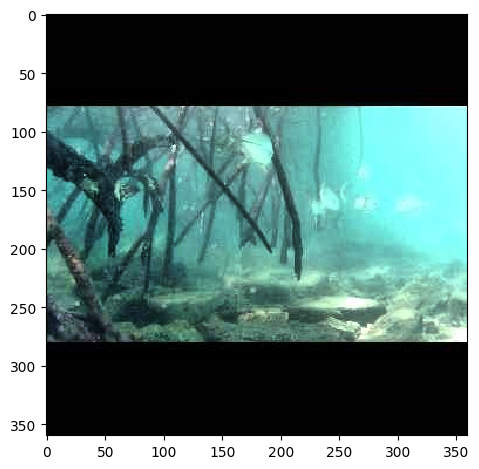

In [31]:
ski.io.imshow(ski.img_as_ubyte(eq_img))

In [20]:
eq_img[234]

array([[0.27973678, 0.47244434, 0.42271335],
       [0.29664922, 0.49231148, 0.44181799],
       [0.32234843, 0.52220445, 0.4706287 ],
       ...,
       [0.59623692, 0.87981302, 0.79983001],
       [0.58046346, 0.85994587, 0.7811175 ],
       [0.58046346, 0.85994587, 0.7811175 ]])

In [32]:
ski.io.imsave('/tmp/dio.png', ski.img_as_ubyte(eq_img))

In [10]:
ski.exposure.equalize_adapthist(image, kernel_size=None, clip_limit=0.01, nbins=256).io.imsave('/tmp/dio.jpg')

AttributeError: 'numpy.ndarray' object has no attribute 'io'

## From images to video

In [5]:
def to_mp4(img_folder: str, video_base_path: str) -> None:
    """
    Converts a series of images in alphabetical order to a .mp4 video.
    Based on code from https://stackoverflow.com/questions/44947505/how-to-make-a-movie-out-of-images-in-python

    @img_folder: Path to the folder containing the .jpg images to be concatenated. 
    @video_path:
    """
    images = [img for img in os.listdir(img_folder) if img.endswith(".jpg")]
    images.sort()
    frame = cv2.imread(os.path.join(img_folder, images[0]))
    height, width, layers = frame.shape
    
    video = None
    prev_key = None

    os.makedirs(video_base_path)
    
    for img in images:
        # The frames are being grouped together based on the image name.
        # Basically anything before the `_f\d\d\d\d\d\d_jpg...` is being used as the key to group.
        parts = img.split('_')
        key = '_'.join(parts[0:-2])
        fnumber_and_hash = ''.join(parts[-2:])
        print(parts)
        print(key, fnumber_and_hash)
        video_path = os.path.join(video_base_path, key)
        video_path += '.mp4'
        print(video_path)
        if not video or prev_key != key:  # Start a new video
            print(f'Starting a new video for {key}')
            video = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*"mp4v"), 1, (width, height))
        prev_key = key
        video.write(cv2.imread(os.path.join(img_folder, img)))
    
    cv2.destroyAllWindows()
    video.release()    

# to_mp4(img_folder='./datasets/images/train/', video_base_path='./datasets/videos/train/')